# Ensemble Methods Notebook
Welcome to the weekly project on Ensemble Methods. You will be working with a dataset of traffic jams.

## Dataset
The dataset that will be used in this task is `Traffic_Jam.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
This dataset contains traffic data including various counts of vehicle types across different times and days. Below are samples of these columns:

* `Time`: The timestamp of the traffic count (in intervals).
* `Date`: The day of the month the data was recorded.
* `Day of the Week`: The day of the week for the recorded data.
* `CarCount`: The number of cars counted during the time interval.
* `BikeCount`: The number of bikes counted during the time interval.
* `BusCount`: The number of buses counted during the time interval.
* `TruckCount`: The number of trucks counted during the time interval.
* `Total`: Total vehicles counted during the time interval.
* `Traffic Situation`: Qualitative assessment of the traffic (e.g., normal, congested).

## Goal
The primary goal of this exam is to develop a predictive model capable of determining the `Traffic Situation` based on your choice of features provided in the dataset. Students are expected to apply ensemble methods to build and evaluate their models.

# Import Libraries

In [544]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset


In [545]:
df =pd.read_csv("Traffic_Jams.csv")

In [546]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


# Exploratory Data Analysis (EDA)

Below are some steps and visualizations to perform EDA on the dataset:

1. **Summary Statistics**: Obtain summary statistics for the dataset to understand the central tendencies and dispersion of numerical features.describe() Done

2. **Distribution of the Target Variable**: Analyze the distribution of the target variable `Traffic Situation` to understand the class balance.Done

3. **Correlation Analysis**: Analyze correlations between features. done

In [547]:
#to check the columns types and if there is non values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               6324 non-null   object
 1   Date               6324 non-null   int64 
 2   Day of the week    6324 non-null   object
 3   CarCount           6324 non-null   int64 
 4   BikeCount          6324 non-null   int64 
 5   BusCount           6324 non-null   int64 
 6   TruckCount         6324 non-null   int64 
 7   Total              6324 non-null   int64 
 8   Traffic Situation  6324 non-null   object
dtypes: int64(6), object(3)
memory usage: 444.8+ KB


In [548]:
#summary Statistics:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000
mean,16.043327,64.355629,12.013283,12.557875,18.658128,107.584915
std,8.956907,44.307088,11.363955,12.319831,10.724822,55.850784
min,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,18.000000,3.000000,1.000000,10.000000,53.000000
50%,16.000000,61.000000,9.000000,10.000000,18.000000,103.000000
75%,24.000000,101.250000,19.000000,20.000000,27.000000,151.000000
max,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000


Text(0.5, 1.0, 'The Distribution of the Traffic ')

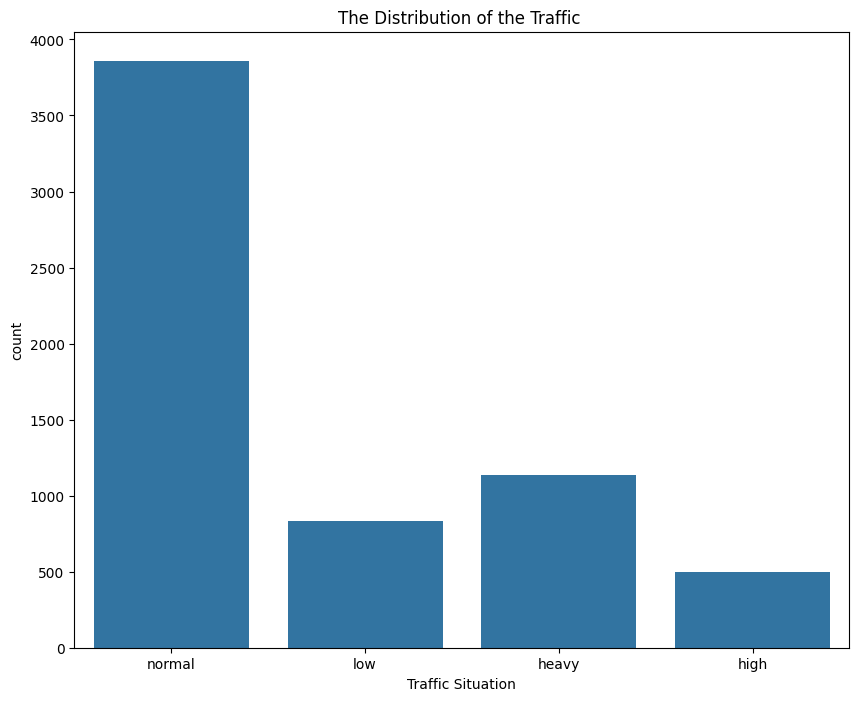

In [549]:
#Distribution of the target
plt.figure(figsize=(10,8))
sns.countplot(data=df,x=df["Traffic Situation"])
plt.title("The Distribution of the Traffic ")

<Axes: >

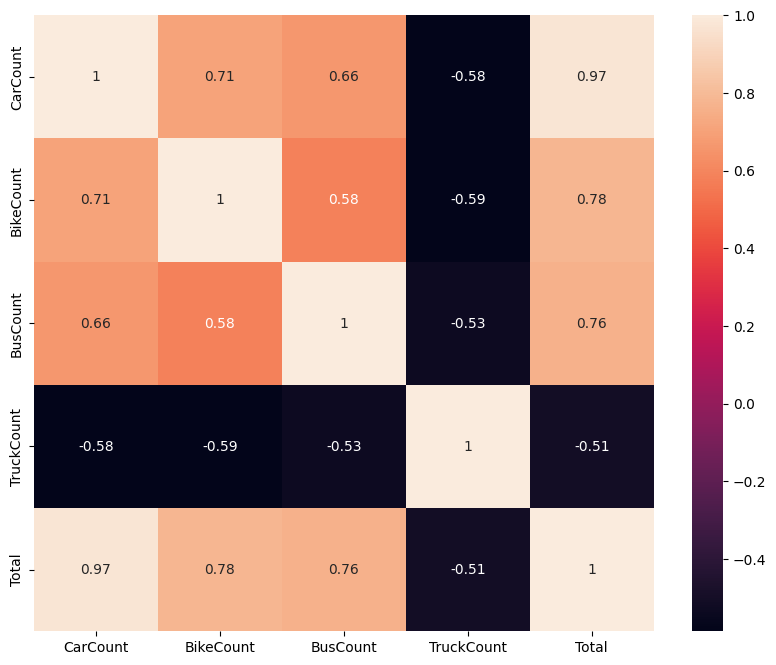

In [550]:
#Correlation Analysis
num_columns=['CarCount',	'BikeCount'	,'BusCount','TruckCount','Total']
df_corr=df[num_columns]
plt.figure(figsize=(10,8))
sns.heatmap(df_corr.corr(),annot=True)

#### My commient
**From the heatmap we understand that there is a realtionship between the Total number of vichals and cars which could tell us that most of the viacls in the road are cars the more totla vicals we have the more cars we will have over all kind of vicals**


# Preprocess the data (if necessary)

Before building models, it's crucial to preprocess the data to ensure it's clean and suitable for training. Follow these steps to prepare the dataset:

1. **Check for Missing Values**: Determine if there are any missing values in the dataset and handle them appropriately. You can choose to fill them with a mean, median, or mode value, or drop rows with missing values if necessary.Done
2. **Encode Categorical Variables**: Convert categorical variables into numerical representations. This can be done using techniques such as one-hot encoding and lable-encoder. Done

3. **Feature Scaling**: Standardize or Normalize numerical features if needed to have a consistent scale.

4. **Remove Unnecessary Columns**: Drop any columns that are not relevant for modeling. Done

In [551]:
# check if there is non valus or missing data
df.isna().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [552]:
# to check if there is a mising values that are not null for the object columns
j=0
columns_val=["Day of the week","Time","Date","Traffic Situation"]
for i in range(4):

    print("\n",df[columns_val[j]].value_counts())
    j=1+j


 Day of the week
Thursday     1020
Wednesday    1012
Tuesday      1011
Friday        832
Saturday      819
Sunday        816
Monday        814
Name: count, dtype: int64

 Time
9:30:00 PM     77
7:15:00 PM     74
1:30:00 AM     73
9:00:00 PM     72
12:30:00 AM    72
               ..
5:15:00 PM     62
5:30:00 PM     62
5:45:00 PM     62
6:00:00 PM     62
12:00:00 PM    62
Name: count, Length: 96, dtype: int64

 Date
27    211
31    211
26    208
19    208
13    208
4     208
3     207
8     207
20    206
21    205
29    205
14    204
16    204
22    204
30    204
1     203
28    203
23    203
5     203
24    203
6     203
18    203
15    203
12    203
9     202
11    201
17    200
10    199
2     199
7     198
25    198
Name: count, dtype: int64

 Traffic Situation
normal    3858
heavy     1137
low        834
high       495
Name: count, dtype: int64


In [553]:
df["Time"].head()

,Time
0,12:00:00 AM
1,12:15:00 AM
2,12:30:00 AM
3,12:45:00 AM
4,1:00:00 AM


In [554]:
#let us change the type of the time to dataTime type

df["Time"]=pd.to_datetime(df["Time"])

<ipython-input-554-06d5212e48e7>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Time"]=pd.to_datetime(df["Time"])


In [555]:
#let us change the catogiracl columns which is the Day of the week only
encoder=OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[['Day of the week']])

df_encoded=pd.DataFrame(encoded,columns=encoder.get_feature_names_out(["Day of the week"]))
df=pd.concat([df,df_encoded],axis=1)
df.drop("Day of the week",axis=1,inplace=True)

In [556]:
#check after encoding
df.head()

,Time,Date,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Day of the week_Friday,Day of the week_Monday,Day of the week_Saturday,Day of the week_Sunday,Day of the week_Thursday,Day of the week_Tuesday,Day of the week_Wednesday
0,2024-08-11 00:00:00,10,13,2,2,24,41,normal,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2024-08-11 00:15:00,10,14,1,1,36,52,normal,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2024-08-11 00:30:00,10,10,2,2,32,46,normal,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2024-08-11 00:45:00,10,10,2,2,36,50,normal,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2024-08-11 01:00:00,10,11,2,1,34,48,normal,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [557]:
df["Traffic Situation"].value_counts()


,count
Traffic Situation,
normal,3858
heavy,1137
low,834
high,495


In [558]:
#replace the the vlau of high an low beacuse they can be as normal and heavy
df["Traffic Situation"].replace("low",'normal',inplace=True)
df["Traffic Situation"].replace("high",'heavy',inplace=True)


In [559]:
#check after replacement
df["Traffic Situation"].value_counts()


,count
Traffic Situation,
normal,4692
heavy,1632


In [560]:
#encode the target
la_encoder=LabelEncoder()
la_encoder.fit
la_encoder.fit(['heavy', 'normal'])
df["Traffic Situation"]=la_encoder.fit_transform(df['Traffic Situation'])

In [561]:
#check after encodeing
df["Traffic Situation"].value_counts()


,count
Traffic Situation,
1,4692
0,1632


In [562]:
#do the describe agen to make sure that all the columns are numbers now
df.describe()

,Time,Date,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Day of the week_Friday,Day of the week_Monday,Day of the week_Saturday,Day of the week_Sunday,Day of the week_Thursday,Day of the week_Tuesday,Day of the week_Wednesday
count,6324,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000
mean,2024-08-11 11:52:14.914611200,16.043327,64.355629,12.013283,12.557875,18.658128,107.584915,0.741935,0.131562,0.128716,0.129507,0.129032,0.161290,0.159867,0.160025
min,2024-08-11 00:00:00,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2024-08-11 05:45:00,8.000000,18.000000,3.000000,1.000000,10.000000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2024-08-11 11:45:00,16.000000,61.000000,9.000000,10.000000,18.000000,103.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2024-08-11 18:00:00,24.000000,101.250000,19.000000,20.000000,27.000000,151.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2024-08-11 23:45:00,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,8.956907,44.307088,11.363955,12.319831,10.724822,55.850784,0.437604,0.338041,0.334912,0.335786,0.335262,0.367828,0.366512,0.366659


In [563]:
#Drop unwanted columns
df.drop('Date',inplace=True,axis=1)


In [564]:
df.sample()

,Time,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Day of the week_Friday,Day of the week_Monday,Day of the week_Saturday,Day of the week_Sunday,Day of the week_Thursday,Day of the week_Tuesday,Day of the week_Wednesday
4869,2024-08-11 17:15:00,104,31,41,9,185,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [565]:
#scal the data
columns=['CarCount',	'BikeCount',	'BusCount',	'TruckCount',	'Total'	]
columns_scal=['CarCount_scaled',	'BikeCount_scaled',	'BusCount_scaled',	'TruckCount_scaled',	'Total_scaled'	]
scaler=StandardScaler()
scaled=scaler.fit_transform(df[columns])
df_scaled=pd.DataFrame(scaled,columns=columns_scal)
df=pd.concat([df,df_scaled],axis=1)
df.drop(columns,axis=1,inplace=True)

In [566]:
df.describe()

,Time,Traffic Situation,Day of the week_Friday,Day of the week_Monday,Day of the week_Saturday,Day of the week_Sunday,Day of the week_Thursday,Day of the week_Tuesday,Day of the week_Wednesday,CarCount_scaled,BikeCount_scaled,BusCount_scaled,TruckCount_scaled,Total_scaled
count,6324,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6.324000e+03,6.324000e+03,6.324000e+03,6.324000e+03,6.324000e+03
mean,2024-08-11 11:52:14.914611200,0.741935,0.131562,0.128716,0.129507,0.129032,0.161290,0.159867,0.160025,-6.966105e-17,-5.393114e-17,-4.494261e-17,1.258393e-16,1.078623e-16
min,2024-08-11 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.339748e+00,-1.057223e+00,-1.019403e+00,-1.739852e+00,-1.550413e+00
25%,2024-08-11 05:45:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.046318e+00,-7.932094e-01,-9.382262e-01,-8.073619e-01,-9.774121e-01
50%,2024-08-11 11:45:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.574171e-02,-2.651824e-01,-2.076390e-01,-6.136977e-02,-8.209871e-02
75%,2024-08-11 18:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.327627e-01,6.148625e-01,6.041246e-01,7.778714e-01,7.774021e-01
max,2024-08-11 23:45:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.610271e+00,5.103092e+00,3.039415e+00,3.855089e+00,3.069404e+00
std,NaN,0.437604,0.338041,0.334912,0.335786,0.335262,0.367828,0.366512,0.366659,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00


In [567]:
df_scaled


,CarCount_scaled,BikeCount_scaled,BusCount_scaled,TruckCount_scaled,Total_scaled
0,-1.159175,-0.881214,-0.857050,0.498124,-1.192287
1,-1.136604,-0.969218,-0.938226,1.617112,-0.995318
2,-1.226890,-0.881214,-0.857050,1.244116,-1.102756
3,-1.226890,-0.881214,-0.857050,1.617112,-1.031131
4,-1.204319,-0.881214,-0.938226,1.430614,-1.066943
...,...,...,...,...,...
6319,-0.865746,0.350849,0.035890,-0.247868,-0.655099
6320,0.172545,1.142889,-0.207639,0.777871,0.472996
6321,0.962549,0.086836,0.117066,0.871120,0.974371
6322,0.939977,0.526858,0.035890,0.777871,1.010184


# Visualize the Data

Visualizing the data helps in understanding the relationships between features and the target variable. Below are some common visualizations that can be used to gain insights into the dataset:

1. **Count Plots for Categorical Features**: Use count plots to visualize the frequency of categorical features such as the `Traffic Situation`.

2. **Correlation Heatmap**: Create a heatmap to visualize the correlation between numerical features and identify any strong relationships.

Text(0.5, 1.0, 'The Distribution of the Traffic ')

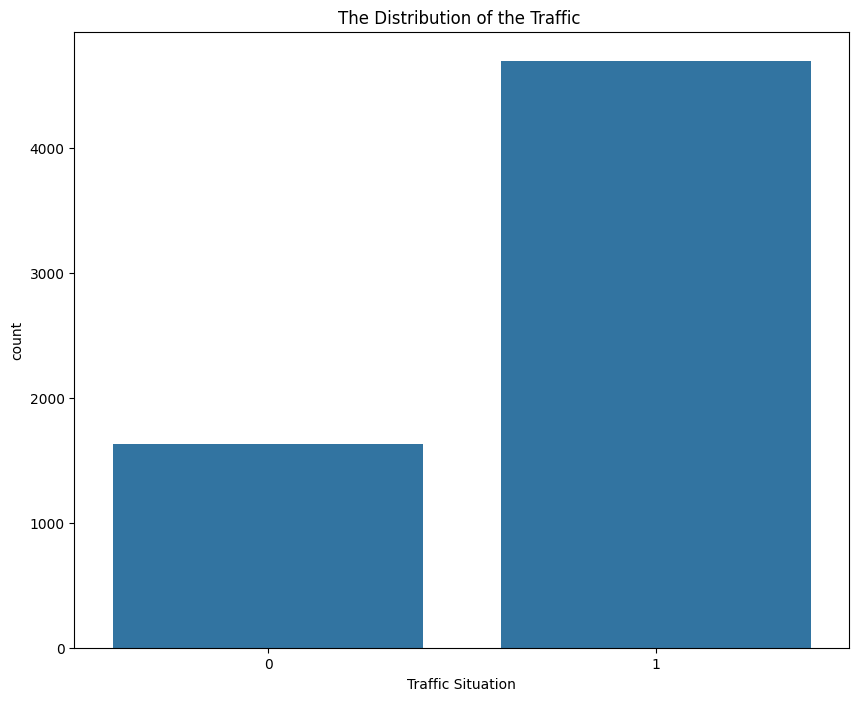

In [568]:
#aftter delaing with the data
plt.figure(figsize=(10,8))
sns.countplot(data=df,x=df["Traffic Situation"])
plt.title("The Distribution of the Traffic ")

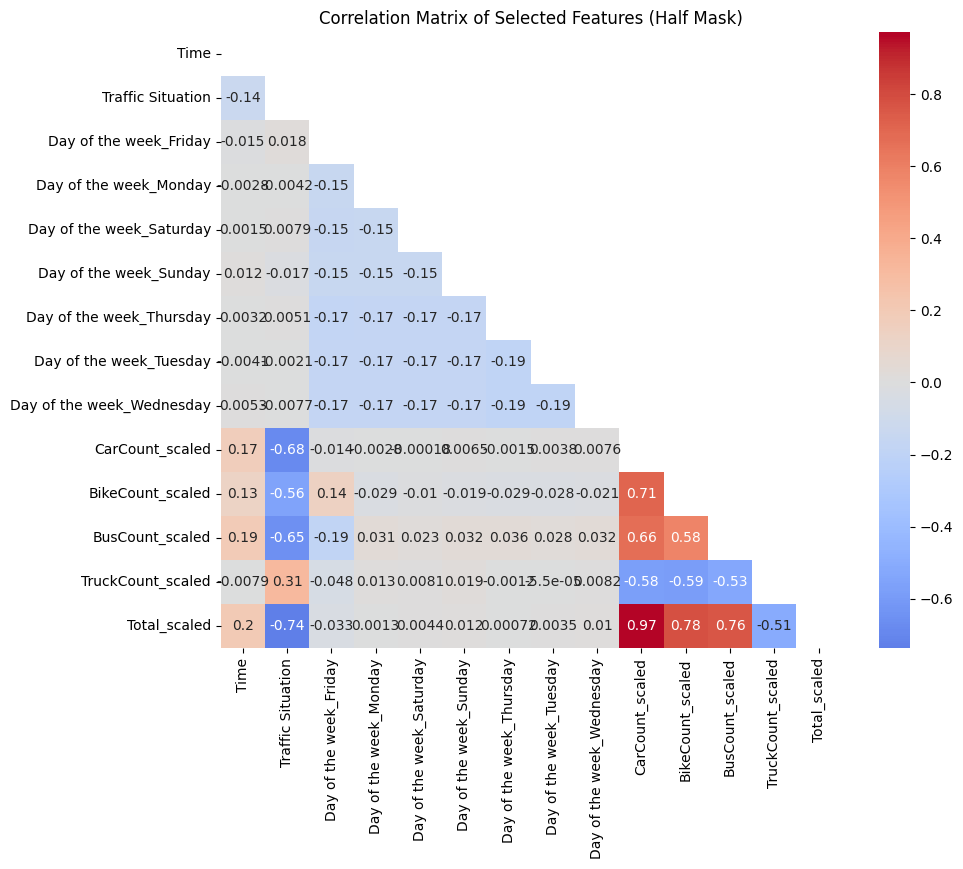

In [569]:
#heat mape

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0, mask=mask)
plt.title('Correlation Matrix of Selected Features (Half Mask)')
plt.show()

# Split the Dataset

1. **Define Features and Target**: Separate the dataset into features (`X`) and the target variable (`y`).

2. **Train-Test Split**: Use the `train_test_split` function from `sklearn.model_selection` to split the data.

In [570]:
#here i drpped the Time beacause it dateTime type and it could not be triand with the model
df.drop('Time',inplace=True,axis=1)

In [571]:
X=df.drop("Traffic Situation",axis=1)
y=df["Traffic Situation"]

In [572]:
#spilt all the data to testing and traing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [573]:
#spilt the training data to trianing and valdation to check for overfiting
X_train_real,X_val,y_train_real,y_val=train_test_split(x_train,y_train,test_size=0.1,random_state=42)

# Initialize and Train the Classifiers

In [574]:
# i imported the models here
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

## Bagging
Chose the bagging model to go with and initialize and train a the model.

In [575]:
#train the mdel on the data
rndf=RandomForestClassifier()
rndf.fit(X_train_real,y_train_real)


RandomForestClassifier()

### Evaluate the model performance

In [576]:
#print the accuracy for the valdation data
accuracy_score(rndf.predict(X_val),y_val)

0.9664031620553359

In [577]:
#print the accuracy for the testing data
accuracy_score(rndf.predict(X_test),y_test)

0.9636363636363636

In [578]:
#check other musrement
print(classification_report(rndf.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       322
           1       0.98      0.98      0.98       943

    accuracy                           0.96      1265
   macro avg       0.95      0.95      0.95      1265
weighted avg       0.96      0.96      0.96      1265



## Boosting
Chose the Boosting model to go with and initialize and train a the model.

In [579]:
xgb_clf=xgb.XGBClassifier()
xgb_clf.fit(X_train_real,y_train_real)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Evaluate the model performance

In [580]:
#valdation
accuracy_score(xgb_clf.predict(X_val),y_val)

0.9664031620553359

In [581]:
#testing
accuracy_score(xgb_clf.predict(X_test),y_test)

0.9636363636363636

In [582]:
#check other musrement
print(classification_report(xgb_clf.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       326
           1       0.97      0.98      0.98       939

    accuracy                           0.96      1265
   macro avg       0.95      0.95      0.95      1265
weighted avg       0.96      0.96      0.96      1265



## Stacking Classifier
Combine the previous classifiers as the base models using a Stacking Classifier.

In [583]:
#models
base_models=[
    ('random_forest',rndf),
    ('xgboost',xgb_clf)
]

### Define meta-learner (LogisticRegression)

In [584]:
#combianing model
meta_model=LogisticRegression()

### Initialize and Train the Stacking Classifier

Stacking combines multiple models (base learners) using a meta-learner. The meta-learner is trained on the predictions of the base learners to make the final prediction.

In [585]:
stacking_clf=StackingClassifier(estimators=base_models,final_estimator=meta_model)


In [586]:
#train the model
stacking_clf.fit(X_train_real,y_train_real)

StackingClassifier(estimators=[('random_forest', RandomForestClassifier()),
                               ('xgboost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_t...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=LogisticRegression())

### Evaluate the model performance

In [587]:
#valdation
accuracy_score(stacking_clf.predict(X_val),y_val)

0.9664031620553359

In [588]:
#testing
accuracy_score(stacking_clf.predict(X_test),y_test)

0.9652173913043478

In [589]:
#check other musrement
print(classification_report(stacking_clf.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       322
           1       0.98      0.98      0.98       943

    accuracy                           0.97      1265
   macro avg       0.95      0.95      0.95      1265
weighted avg       0.97      0.97      0.97      1265



# Notebook Questions:

After completing the tasks in this notebook, take some time to reflect on the work you have done and answer the following questions. These questions are designed to help you think critically about the steps you took and the decisions you made.

* **Feature Selection and Engineering**
   - Which features did you find most important for predicting churn, and why do you think they are significant?
   - Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?

* **Model Selection**
   - Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
   - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?

* **Model Evaluation**
   - Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?


# Answer here:

- yes , the features that i saw importent are the car count the the toal count of  all the vicals ,
i did change some of the features (encode them) suc as the day of the week

- after doing the three i think stacking is the best provided me with the best accuracy and the least overfting beacause it combain the two prevoius models and com with better model
- i did the accuracy on both the valdation dat anad the testing data only to check for overfiting and i did take the classfication metrix for the testing data in each model
